## Big Data Mart Sales Problem:<br>
**Problem Statement:**<br>
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.<br>

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.<br>

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [1]:
# Importing necessary liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading the train and test datasets

train_df=pd.read_csv('bigdatamart_Train.csv')
test_df=pd.read_csv('bigdatamart_Test.csv')

## Saving the copies of original datasets

train_df_copy=train_df
test_df_copy=test_df

In [3]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print('train_shape: ',train_df.shape)
print('test_shape: ',test_df.shape)

train_shape:  (8523, 12)
test_shape:  (5681, 11)


- **train dataset has 8523 rows and 12 columns**
- **test dataset has 5681 rows and 11 columns**

In [6]:
print('columns with object data in train_df: ',train_df.select_dtypes(include='object').columns)


print('---------------------------------------------------------------------')

print('Number of columns with object data in train_df:',len(train_df.select_dtypes(include='object').columns
))

columns with object data in train_df:  Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
---------------------------------------------------------------------
Number of columns with object data in train_df: 7


### **In testing data:**
- **7 Columns has object type data:** 
 -  'Item_Identifier', 
 - 'Item_Fat_Content', 
 - 'Item_Type', 
 - 'Outlet_Identifier', 
 - 'Outlet_Size', 
 - 'Outlet_Location_Type', 
 - 'Outlet_Type'


- **4 Columns has numeric data:** 
 - 'Item_Weight', 
 - 'Item_Visibility', 
 - 'Item_MRP', 
 - 'Outlet_Establishment_Year'


- **Target column 'Item_Outlet_Sales' has numeric data**

In [7]:
print('columns with object data in test_df: ',test_df.select_dtypes(include='object').columns)


print('---------------------------------------------------------------------')

print('Number of columns with object data in test_df:',len(test_df.select_dtypes(include='object').columns
))

columns with object data in test_df:  Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
---------------------------------------------------------------------
Number of columns with object data in test_df: 7


### **In testing data:**
- **Columns with object type data:** 
 -  'Item_Identifier', 
 - 'Item_Fat_Content', 
 - 'Item_Type', 
 - 'Outlet_Identifier', 
 - 'Outlet_Size', 
 - 'Outlet_Location_Type', 
 - 'Outlet_Type'


- **Columns with numeric data:** 
 - 'Item_Weight', 
 - 'Item_Visibility', 
 - 'Item_MRP', 
 - 'Outlet_Establishment_Year'

In [8]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### In training set:
- 'Item_Weight' has 1463 missing values
- 'Outlet_Size' has 2410 missing values

In [9]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### In training set:
- 'Item_Weight' has 976 missing values
- 'Outlet_Size' has 1606 missing values

# Data Cleaning & EDA

### Replacing missing values with:
- mean in 'Item_Weight'
- mode in 'Outlet_Size'

In [10]:
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean())
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean())

In [11]:
train_df['Outlet_Size']=train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode())
test_df['Outlet_Size']=test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode())

In [12]:
train_df['Outlet_Size'].replace(np.nan,'Medium',inplace=True)

In [13]:
test_df['Outlet_Size'].replace(np.nan,'Medium',inplace=True)

In [14]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##  **Checking the unique classes in all catagorical features**

In [15]:
len(train_df['Item_Identifier'].unique())

1559

***We willdrop 'Item_Identifier' as it stores itentification numbers for the products whcih will not add any value to our analysis**

In [16]:
train_df.drop('Item_Identifier',axis=1,inplace=True)
test_df.drop('Item_Identifier',axis=1,inplace=True)

In [17]:
print('train_shape: ',train_df.shape)
print('test_shape: ',test_df.shape)

train_shape:  (8523, 11)
test_shape:  (5681, 10)


In [18]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

here, 
- 'Low Fat','LF' and 'Low Fat' are same. Need store to them in a single catagory
- 'Regular' and 'reg are same catagory. Need to store them in a single catagory. 

In [19]:
train_df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [20]:
test_df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [21]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [143]:
test_df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

- More products tend to have low fat content

In [22]:
train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [23]:
train_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [24]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

- There are more stores in Tier3 locations

In [147]:
train_df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- Most of the stores are of 'Medium' size

In [148]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

- Most of the outlets are of type 'Supermarket Type1 '

In [25]:
train_df['Outlet_Establishment_Year'].value_counts().sort_index()

1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: Outlet_Establishment_Year, dtype: int64

#### Applying Label encoder to 'Outlet_Identifier' and 'Item Type'

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

a=['Outlet_Identifier','Item_Type']

for i in a:
    train_df[i]=le.fit_transform(train_df[i])

In [27]:
train_df[['Outlet_Identifier','Item_Type']].head()

,Outlet_Identifier,Item_Type
0,9,4
1,3,14
2,9,10
3,0,6
4,1,9


#### Applying Ordinal Encoder to 'Outlet_Location_Type','Outlet_Size' and ''Item_Fat_Content''

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
oe1=OrdinalEncoder(categories=[['Small','Medium','High']])
outsize=oe1.fit_transform(train_df[['Outlet_Size']])


In [30]:
train_df['Outlet_Size']=outsize

In [31]:
train_df['Outlet_Size'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    2.0
Name: Outlet_Size, dtype: float64

In [32]:
oe2=OrdinalEncoder(categories=[['Tier 3','Tier 2','Tier 1']])
outloc=oe2.fit_transform(train_df[['Outlet_Location_Type']])
train_df['Outlet_Location_Type']=outloc
train_df['Outlet_Location_Type'].head()

0    2.0
1    0.0
2    2.0
3    0.0
4    0.0
Name: Outlet_Location_Type, dtype: float64

In [33]:
oe3=OrdinalEncoder(categories=[['Low Fat','Regular']])
fat=oe3.fit_transform(train_df[['Item_Fat_Content']])
train_df['Item_Fat_Content']=fat
train_df['Item_Fat_Content'].head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Item_Fat_Content, dtype: float64

#### Applying one hot encoding to 'Outlet_Type'

In [34]:
train_df=pd.get_dummies(train_df,drop_first=True)

In [35]:
train_df.dtypes

Item_Weight                      float64
Item_Fat_Content                 float64
Item_Visibility                  float64
Item_Type                          int32
Item_MRP                         float64
Outlet_Identifier                  int32
Outlet_Establishment_Year          int64
Outlet_Size                      float64
Outlet_Location_Type             float64
Item_Outlet_Sales                float64
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
dtype: object

In [36]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.0,0.016047,4,249.8092,9,1999,1.0,2.0,3735.1380,1,0,0
1,5.92,1.0,0.019278,14,48.2692,3,2009,1.0,0.0,443.4228,0,1,0
2,17.50,0.0,0.016760,10,141.6180,9,1999,1.0,2.0,2097.2700,1,0,0
3,19.20,1.0,0.000000,6,182.0950,0,1998,1.0,0.0,732.3800,0,0,0
4,8.93,0.0,0.000000,9,53.8614,1,1987,2.0,0.0,994.7052,1,0,0


**Now, we have successfully encoded all the catagorical features**

In [37]:
## will treat 'Outlet_Establishment_Year' also as a catagorical feature and will apply ordinal encoding to it
years=train_df['Outlet_Establishment_Year'].replace([1985,1987,1997,1998,1999,2002,2004,2007,2009],[9,8,7,6,5,4,3,2,1])
train_df['Outlet_Establishment_Year']=years
train_df['Outlet_Establishment_Year'].head()

0    5
1    1
2    5
3    6
4    8
Name: Outlet_Establishment_Year, dtype: int64

# Exploratory Data Analysis

- Checking the statistical summery of continuous variables

In [38]:
train_df[['Item_Weight','Item_Visibility','Item_MRP']].describe()

,Item_Weight,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782
std,4.226124,0.051598,62.275067
min,4.555000,0.000000,31.290000
25%,9.310000,0.026989,93.826500
50%,12.857645,0.053931,143.012800
75%,16.000000,0.094585,185.643700
max,21.350000,0.328391,266.888400


- 'Item_Weight','Item_MRP' looks normally distributed
- possible skewness in 'Item_Visibility'

In [39]:
cont_feat=train_df[['Item_Weight','Item_Visibility','Item_MRP']]
train_df[['Item_Weight','Item_Visibility','Item_MRP']].skew()

Item_Weight        0.090561
Item_Visibility    1.167091
Item_MRP           0.127202
dtype: float64

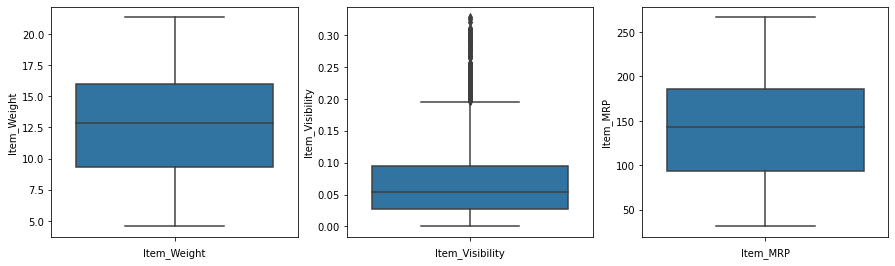

In [40]:
plt.figure(figsize=(15,50))
plotnumber=1

parameters = {'ytick.labelsize': 10,
          'xtick.labelsize': 10}
plt.rcParams.update(parameters)

for column in cont_feat:
    if plotnumber<=4:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(cont_feat[column],orient='v')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

- As suspected, 'Item_Visibility' has outliers and skewness

In [41]:
# rejecting data beyond 3 std to manage skewness and outliers
from scipy.stats import zscore

z_score=zscore(train_df[['Item_Visibility']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
train_df=train_df[filtering_entry]

train_df.shape

(8428, 13)

In [42]:
data_loss=((8523-8428)/8523)*100
data_loss

1.1146309984747156

In [43]:
train_df['Item_Visibility'].skew()

0.7959559838578066

In [44]:
## using square root transformation to remove rest of the skewness
train_df.loc[:,['Item_Visibility']]=np.sqrt(train_df['Item_Visibility'])

In [45]:
train_df['Item_Visibility'].skew()

-0.24574964076665953

**Successfully removed outliers and skewness**

In [46]:
cont_feat=train_df[['Item_Weight','Item_Visibility','Item_MRP']]

In [47]:
cont_feat.corrwith(train_df['Item_Outlet_Sales'])

Item_Weight        0.010575
Item_Visibility   -0.073081
Item_MRP           0.573491
dtype: float64

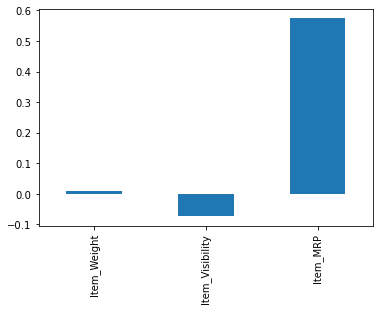

In [48]:
cont_feat.corrwith(train_df['Item_Outlet_Sales']).plot(kind='bar')

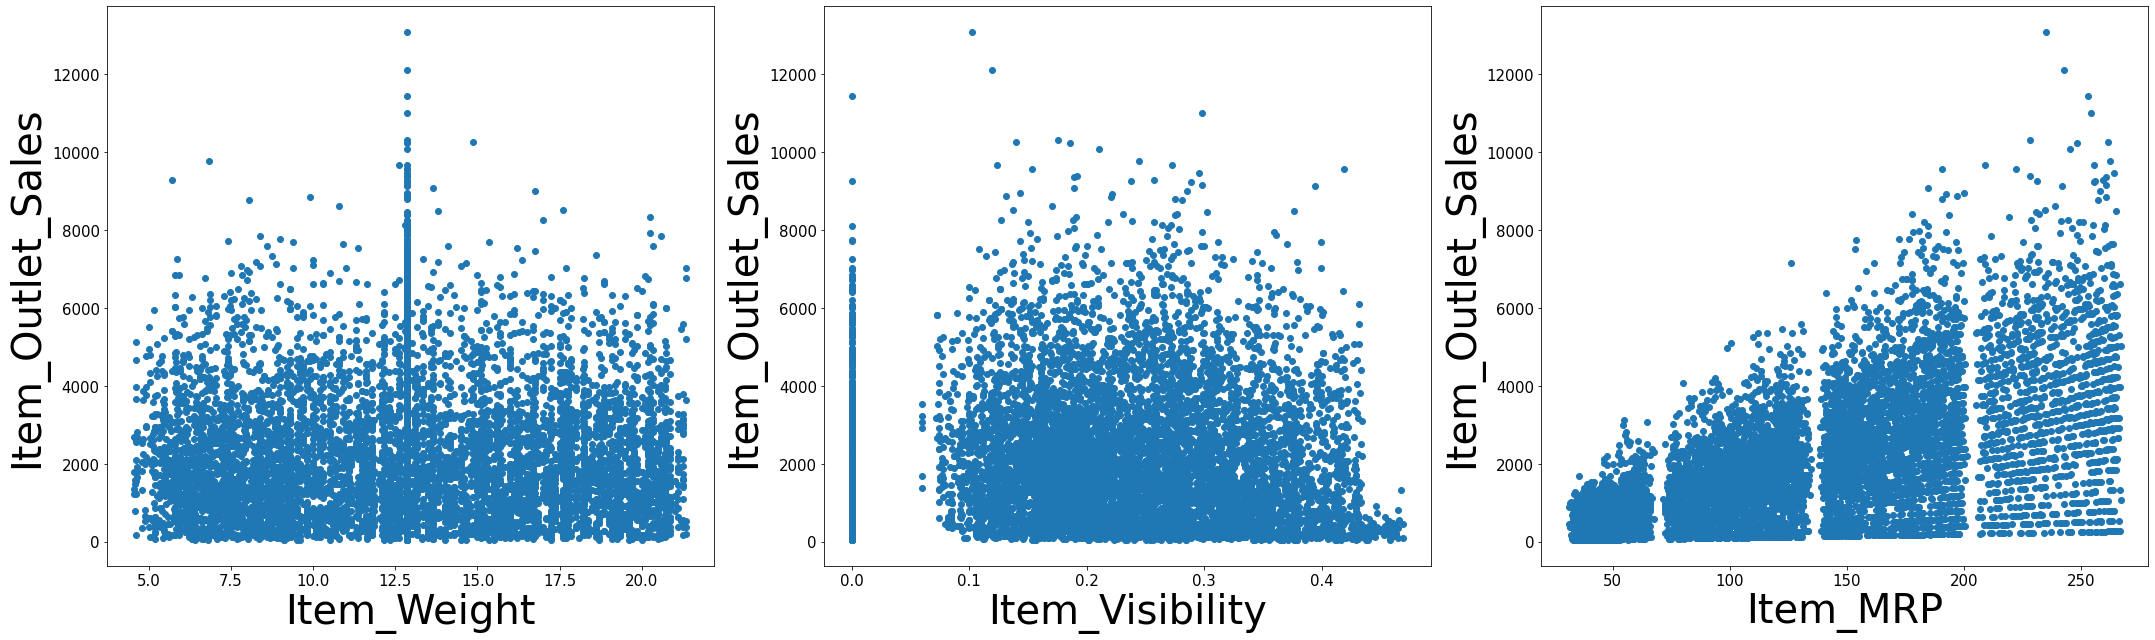

In [49]:
plt.figure(figsize=(40,9),facecolor='white')
plotnumber=1

parameters = {'ytick.labelsize': 15,
          'xtick.labelsize': 15}
plt.rcParams.update(parameters)


for column in cont_feat:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        plt.scatter(cont_feat[column],train_df['Item_Outlet_Sales'])
        plt.xlabel(column,fontsize=40)
        plt.ylabel('Item_Outlet_Sales', fontsize=40)
    plotnumber+=1
plt.tight_layout()

- Item_Weight has no effect on the product sales.
- Items which are not not visible are also showing good sales, which means customers try and find the items which they want even if they are not easily visible in store.
- Items with the higher MRP tend to sell more.

In [50]:
cat_feat=train_df[['Item_Fat_Content','Item_Type','Outlet_Identifier', 'Outlet_Establishment_Year',
                  'Outlet_Size', 'Outlet_Location_Type','Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']]

In [52]:
cat_feat.shape

(8428, 9)

### Now lets check the relationship between catagorical features and continuous target using ANOVA F-Values

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [59]:
selectbest=SelectKBest(score_func=f_regression,k=9)
selectbest.fit(cat_feat,train_df['Item_Outlet_Sales'])

SelectKBest(k=9, score_func=<function f_regression at 0x0000016F5EF7AE50>)

In [60]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(cat_feat.columns)

In [61]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(11,'Scores')

,Features,Scores
8,Outlet_Type_Supermarket Type3,890.756165
2,Outlet_Identifier,203.781247
6,Outlet_Type_Supermarket Type1,74.588004
5,Outlet_Location_Type,64.970486
4,Outlet_Size,53.573923
7,Outlet_Type_Supermarket Type2,15.332881
3,Outlet_Establishment_Year,11.482280
0,Item_Fat_Content,3.789394
1,Item_Type,2.476655


- 'Outlet_Type_Supermarket Type3' and 'Outlet_Identifier' show strong relationship with target.
- 'Outlet_Type_Supermarket Type1', 'Outlet_Location_Type', 'Outlet_Size' show moderate relationship with target.
- 'Outlet_Type_Supermarket Type2', 'Outlet_Establishment_Year', 'Item_Fat_Content', 'Item_Type' show weak relationship with target.

### Seperating features and target

In [62]:
X=train_df.drop('Item_Outlet_Sales',axis=1)
y=train_df['Item_Outlet_Sales']

### Scaling the features

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [64]:
X_scaled=scaler.fit_transform(X)

### Dividing the data in to training & testing sets

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

### Importing regression performance metrics

In [67]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

## Model 1: KNN Regressor

In [111]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=9)

In [112]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [113]:
knn.score(X_test,y_test)

0.5350984611813097

In [114]:
y_knn=knn.predict(X_test)

In [115]:
knn_score=r2_score(y_test,y_knn)
knn_score

0.5350984611813097

In [116]:
knn_mse=MSE(y_test,y_knn)
knn_mse

1236680.0569118431

In [117]:
knn_cvs=cross_val_score(knn,X_scaled,y,cv=5).mean()
knn_cvs

0.5351594263795663

## Model 2: Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [76]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
rf.score(X_test,y_test)

0.531989660313355

In [78]:
y_rf=rf.predict(X_test)

In [79]:
rf_score=r2_score(y_test,y_rf)
rf_score

0.531989660313355

In [80]:
rf_mse=MSE(y_test,y_rf)
rf_mse

1244949.7478319437

In [82]:
rf_cvs=cross_val_score(rf,X_scaled,y,cv=7).mean()
rf_cvs

0.5490781489480059

## Model 3: Gradient Boosting Regressor

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100)

In [124]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [125]:
gbr.score(X_test,y_test)

0.5880852639745403

In [126]:
y_gbr=gbr.predict(X_test)

In [127]:
gbr_score=r2_score(y_test,y_gbr)
gbr_score

0.5880852639745403

In [128]:
gbr_mse=MSE(y_test,y_gbr)
gbr_mse

1095730.3787059712

In [129]:
gbr_cvs=cross_val_score(gbr,X_scaled,y,cv=5).mean()
gbr_cvs

0.5874173906028721

## Model 4: ADA Boost Regressor

In [90]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [91]:
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [92]:
abr.score(X_test,y_test)

0.39240899941901697

In [93]:
y_abr=abr.predict(X_test)

In [94]:
abr_score=r2_score(y_test,y_abr)
abr_score

0.39240899941901697

In [95]:
abr_mse=MSE(y_test,y_abr)
abr_mse

1616246.9048540941

In [96]:
abr_cvs=cross_val_score(abr,X_scaled,y,cv=5).mean()
abr_cvs

0.443963982609458

## Model 5: Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.560116743741712

In [102]:
y_lr=lr.predict(X_test)

In [130]:
lr_score=r2_score(y_test,y_lr)
lr_score

0.560116743741712

In [131]:
lr_mse=MSE(y_test,y_lr)
lr_mse

1170129.167062667

In [103]:
lr_cvs=cross_val_score(lr,X_scaled,y,cv=5).mean()
lr_cvs

0.5573766032021571

- **Based on Cross Validation Score and MSE, Gradient Boosting Regressor is our best model here.**

### Tuning the hyperparameters for GBR

In [132]:
from sklearn.model_selection import GridSearchCV

In [134]:
gbr_grid={'loss':['ls','lad'],
          'n_estimators':[60,80,100,110],
          'max_depth':range(3,12,3),
           'learning_rate': np.arange(0.1,1,0.1),
           'min_samples_split':range(2,8,2)}

In [135]:
gridCV=GridSearchCV(gbr,param_grid=gbr_grid,n_jobs=-1)

In [136]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'loss': ['ls', 'lad'], 'max_depth': range(3, 12, 3),
                         'min_samples_split': range(2, 8, 2),
                         'n_estimators': [60, 80, 100, 110]})

In [137]:
gridCV.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'min_samples_split': 6,
 'n_estimators': 60}

In [138]:
gbr_best=GradientBoostingRegressor(learning_rate=0.1,loss='ls',max_depth=3,min_samples_split=6,n_estimators=60)

In [139]:
gbr_best.fit(X_train,y_train)

GradientBoostingRegressor(min_samples_split=6, n_estimators=60)

In [140]:
gbr_best.score(X_test,y_test)

0.5905165523503519

In [141]:
y_best=gbr_best.predict(X_test)

In [142]:
best_score=r2_score(y_test,y_best)
best_score

0.5905165523503519

In [143]:
best_mse=MSE(y_test,y_best)
best_mse

1089262.9321696402

In [144]:
best_cvs=cross_val_score(gbr_best,X_scaled,y,cv=5).mean()
best_cvs

0.5889819919531879

## Saving our best model

In [145]:
## Saving the best model
import pickle
filename='BigMart_gbr.pkl'
pickle.dump(gbr_best,open(filename,'wb'))

In [147]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Sales Prediction

## Applying all the encoding methods applied to train_df to test_df.

In [153]:
a=['Outlet_Identifier','Item_Type']

for i in a:
    test_df[i]=le.fit_transform(test_df[i])

In [154]:
oe1=OrdinalEncoder(categories=[['Small','Medium','High']])
outsize=oe1.fit_transform(test_df[['Outlet_Size']])
test_df['Outlet_Size']=outsize

In [155]:
oe2=OrdinalEncoder(categories=[['Tier 3','Tier 2','Tier 1']])
outloc=oe2.fit_transform(test_df[['Outlet_Location_Type']])
test_df['Outlet_Location_Type']=outloc
test_df['Outlet_Location_Type'].head()

0    2.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Outlet_Location_Type, dtype: float64

In [156]:
oe3=OrdinalEncoder(categories=[['Low Fat','Regular']])
fat=oe3.fit_transform(test_df[['Item_Fat_Content']])
test_df['Item_Fat_Content']=fat
test_df['Item_Fat_Content'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Item_Fat_Content, dtype: float64

In [157]:
test_df=pd.get_dummies(test_df,drop_first=True)

In [158]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    5681 non-null   float64
 1   Item_Fat_Content               5681 non-null   float64
 2   Item_Visibility                5681 non-null   float64
 3   Item_Type                      5681 non-null   int32  
 4   Item_MRP                       5681 non-null   float64
 5   Outlet_Identifier              5681 non-null   int32  
 6   Outlet_Establishment_Year      5681 non-null   int64  
 7   Outlet_Size                    5681 non-null   float64
 8   Outlet_Location_Type           5681 non-null   float64
 9   Outlet_Type_Supermarket Type1  5681 non-null   uint8  
 10  Outlet_Type_Supermarket Type2  5681 non-null   uint8  
 11  Outlet_Type_Supermarket Type3  5681 non-null   uint8  
dtypes: float64(6), int32(2), int64(1), uint8(3)
memo

In [163]:
## will treat 'Outlet_Establishment_Year' also as a catagorical feature and will apply ordinal encoding to it
years=test_df['Outlet_Establishment_Year'].replace([1985,1987,1997,1998,1999,2002,2004,2007,2009],[9,8,7,6,5,4,3,2,1])
test_df['Outlet_Establishment_Year']=years
test_df['Outlet_Establishment_Year'].head()

0    5
1    2
2    6
3    2
4    9
Name: Outlet_Establishment_Year, dtype: int64

### Scaling the data

In [165]:
X_SalesPred=scaler.fit_transform(test_df)

## Sales prediction based on our best model

In [166]:
y_SalesPred=gbr_best.predict(X_SalesPred)

In [168]:
y_SalesPred

array([1653.74977349, 1382.44565026,  595.01580647, ..., 1855.98877463,
       3632.02781314, 1279.92313495])